### Import the necessary libraries/dependancies

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('cox_2_bioactdata_3class_pIC50_pubchem_fp.csv')

In [3]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.221849
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.490797
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.920819
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.991400
4373,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.790485
4374,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.714443
4375,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.761954


# Input features 

### The Cyclooxygenase-2 dataset contains 881 input features and 1 target/output variable (pIC50)

In [4]:
X = df.drop(columns=['pIC50'], axis=1)

In [5]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4373,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4374,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4375,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Output Features

In [6]:
Y = df.pIC50
Y

0       7.221849
1       5.490797
2       7.096910
3       9.920819
4       4.000000
          ...   
4372    3.991400
4373    3.790485
4374    3.714443
4375    3.761954
4376    8.059982
Name: pIC50, Length: 4377, dtype: float64

In [7]:
X.shape

(4377, 881)

In [8]:
Y.shape

(4377,)

## Remove low variance features 

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(4377, 180)

# Split data into 80% training and 20% testing

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((3501, 180), (3501,))

In [13]:
X_test.shape, Y_test.shape

((876, 180), (876,))

# Build a regression model using Random Forest

In [14]:
import numpy as np 
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4282863818612693

In [15]:
Y_pred = model.predict(X_test)

# Scatter plot of experimental values against predicted pIC50 Values

C:\Users\ryzen5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


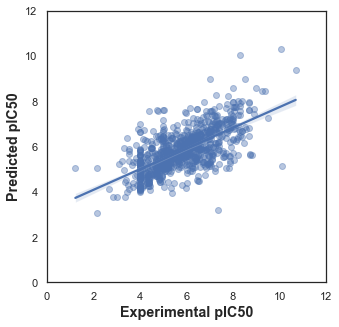

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('plot_exp_vs_pred_pIC50')

In [17]:
Y_pred

array([ 5.33584477,  5.73383977,  4.57213413,  6.28031089,  5.32862344,
        5.24579483,  4.72663649,  5.13219198,  7.09394511,  5.55792329,
        4.67615195,  5.44521963,  5.28236793,  6.12492796,  5.57449876,
        6.06656638,  5.29124224,  5.66927087,  6.75494852,  6.67953228,
        5.97966046,  5.48929675,  6.15706403,  6.29292868,  6.29308196,
        5.21537635,  5.14405243,  4.73541799,  5.13821227,  6.8849626 ,
        4.92340794,  5.6208624 ,  5.54186167,  4.44024132,  6.65041619,
        6.51028952,  4.81859049,  4.10236024,  6.33093956,  7.1399202 ,
        6.43263963,  7.94137581,  5.90514027,  6.03109416,  6.54723814,
        6.36665847,  5.49736305,  5.46851775,  6.54494422,  4.51262912,
        5.90800286,  5.36184208,  5.02436845,  6.74960161,  7.60420443,
        5.49216061,  5.89414454,  5.97574169,  5.77470684,  7.42950935,
        5.79690624,  7.40326474,  4.75160242,  4.86860503,  5.15876561,
        5.6922265 ,  6.65045333,  5.47213495,  6.27011736,  4.97

In [18]:
Y_test

2346    4.774691
3778    5.764472
1820    4.000000
4029    6.187087
3424    4.301030
          ...   
593     7.000000
3010    6.823909
379     7.187087
2616    4.868381
1456    6.000000
Name: pIC50, Length: 876, dtype: float64